In [3]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

Notch filtering

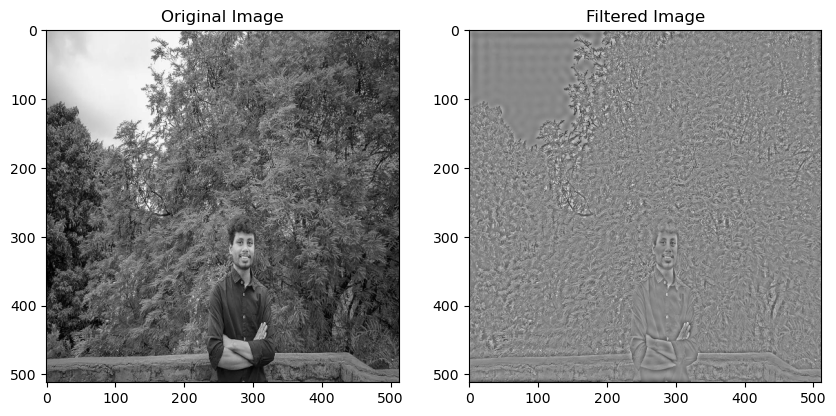

In [9]:
# image=cv2.imread("Images/noisy_image.png",0)
# imager=cv2.imread("Images/miju.jpg",0)
# imager=cv2.imread("Images/child.jpeg",0)
imager=cv2.imread("Images/M1.jpeg",0)
image = cv2.resize(imager, (512, 512), interpolation=cv2.INTER_CUBIC)

dft=np.fft.fft2(image)
dft_shift=np.fft.fftshift(dft)

rows,cols=image.shape
crow,ccol=rows//2,cols//2

notch_filter=np.ones((rows,cols),np.uint8)
notch_size=10

notch_filter[crow-30:crow+30,ccol-30:ccol+30]=0

filtered_dft=dft_shift*notch_filter

idft_shift=np.fft.ifftshift(filtered_dft)
filtered_image=np.fft.ifft2(idft_shift).real

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(filtered_image, cmap='gray'), plt.title("Filtered Image")
plt.show()